##Algoritmo de previsão de preços de ações utilizando rede neural *Long short-term memory*

Utilizando a linguagem Python, desenvolver um programa para prever o preço de ações utilizando *Machine Learning*, mais especificamente uma Arquitetura de Redes Neurais *Long short-term memory (LSTM)*. Para esse projeto, foi utilizado o histórico de preços da ação da Microsoft obtido através da blbioteca *yfinance*.

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [2]:
#Obtendo o conjunto dos dados
today = date.today()

endDate = today.strftime("%Y-%m-%d")
startDate = today - timedelta(days=5000)
startDateF = startDate.strftime("%Y-%m-%d")

data = yf.download('MSFT', start=startDateF, end=endDate, progress=False)

In [21]:
#Verificando as primeiras cinco linhas
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-25,27.610001,27.840000,27.459999,27.660000,20.691088,51381300
2008-08-26,27.580000,27.719999,27.170000,27.270000,20.399338,44774400
2008-08-27,27.340000,27.790001,27.129999,27.559999,20.616282,33975300
2008-08-28,27.610001,28.010000,27.600000,27.940001,20.900537,48372600
2008-08-29,27.680000,27.780001,27.290001,27.290001,20.414305,50735500


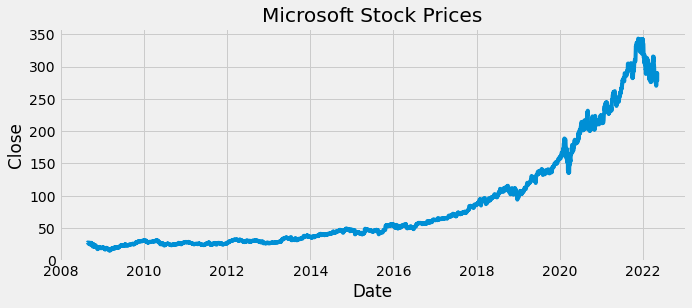

In [16]:
#Plotando o histórico de preços
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])

plt.show()


###Análise Exploratória dos dados

In [22]:
#Verificando as informações dos objetos das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3447 entries, 2008-08-25 to 2022-05-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3447 non-null   float64
 1   High       3447 non-null   float64
 2   Low        3447 non-null   float64
 3   Close      3447 non-null   float64
 4   Adj Close  3447 non-null   float64
 5   Volume     3447 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.5 KB


In [24]:
#Checar se existe valores NA nas colunas dos dados
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
#Estatísticas descritivas das colunas
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3.447000e+03
mean,84.956748,85.775982,84.092930,84.976107,80.499319,4.174088e+07
std,81.167039,81.968905,80.282600,81.166119,82.481501,2.519712e+07
min,15.200000,15.620000,14.870000,15.150000,11.487971,7.425600e+06
25%,28.805000,29.025001,28.510000,28.785001,23.014761,2.479955e+07
50%,46.910000,47.430000,46.529999,47.000000,41.715446,3.484970e+07
75%,108.559998,109.530003,107.475002,108.445000,104.291428,5.166245e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,3.193179e+08


In [28]:
#Verificar a correlação de todas as colunas com a coluna alvo "Close"
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999978
Low          0.999899
High         0.999888
Open         0.999794
Volume      -0.341257
Name: Close, dtype: float64


###Rede Neural *Long short-term memory*

In [56]:
#Preparando os dados e definindo a parte de treinamento e teste
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
#Preparando a arquitetura da rede neural
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=100)

Epoch 1/100
2757/2757 [==============================] - 8s 2ms/step - loss: 1036.9349
Epoch 2/100
2757/2757 [==============================] - 6s 2ms/step - loss: 87.6566
Epoch 3/100
2757/2757 [==============================] - 7s 2ms/step - loss: 62.7435
Epoch 4/100
2757/2757 [==============================] - 6s 2ms/step - loss: 93.4186
Epoch 5/100
2757/2757 [==============================] - 6s 2ms/step - loss: 52.2878
Epoch 6/100
2757/2757 [==============================] - 6s 2ms/step - loss: 40.9659
Epoch 7/100
2757/2757 [==============================] - 6s 2ms/step - loss: 41.1319
Epoch 8/100
2757/2757 [==============================] - 6s 2ms/step - loss: 46.6425
Epoch 9/100
2757/2757 [==============================] - 7s 3ms/step - loss: 23.7567
Epoch 10/100
2757/2757 [==============================] - 6s 2ms/step - loss: 33.4757
Epoch 11/100
2757/2757 [==============================] - 6s 2ms/step - loss: 43.9261
Epoch 12/100
2757/2757 [==============================] - 6s 

In [102]:
#Realizando a predição do preço
import numpy as np

xtest_one = np.array([xtest[0]])
print(model.predict(xtest_one))
print(ytest[0])

[[25.751585]]
[25.79999924]


## Considerações Finais

O objetivo deste projeto foi alcançado, pois me permitiu aprender novos conceitos de *Machine Learning* e praticar a linguagem Python.